# Trabalho de Machile Learning
### Ivanete Fátima de Azevedo



### Parte I - Base de dados Diabetes

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
# Carregar os dados 
dados = pd.read_csv('https://raw.githubusercontent.com/Nethyaze/machine_learning/main/diabetes.csv')

In [7]:
dados


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## KNN

In [8]:
# Separar os recursos (X) da variável de destino (y)
X = dados.drop('Outcome', axis=1)
y = dados['Outcome']

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em 80% treinamento e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo KNN com K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo com os dados de treinamento
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar o desempenho usando acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Outras métricas de avaliação
print(classification_report(y_test, y_pred))

# Matriz de confusão
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.6883116883116883
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154

Matriz de confusão:
[[79 20]
 [28 27]]


**A acurácia do modelo é de aproximadamente 0.6883**, o que significa que ele está acertando corretamente a classe em cerca de 68.83% das vezes.

**Na classe 0 (sem diabetes)**, a precisão é de **0.74** e o recall é de **0.80**. Isso indica que, das instâncias classificadas como "sem diabetes", **74%** delas realmente não têm diabetes (precisão) e o modelo consegue identificar corretamente **80%** das instâncias que são realmente "sem diabetes" (recall).

**Na classe 1 (com diabetes)**, a precisão é de **0.57** e o recall é de **0.49**. Isso indica que, das instâncias classificadas como "com diabetes", apenas **57%** delas realmente têm diabetes (precisão) e o modelo consegue identificar corretamente **49%** das instâncias que são realmente "com diabetes" (recall).

O **f1-score** é uma métrica que combina a precisão e o recall, fornecendo uma medida de desempenho balanceada entre as duas classes. O valor do **f1-score** para a classe 0 é de aproximadamente **0.77** e para a classe 1 é de aproximadamente **0.53**.

A matriz de confusão mostra as previsões do modelo em relação às classes reais. O modelo fez **79** previsões corretas de "sem diabetes" (verdadeiros negativos), **27** previsões corretas de "com diabetes" (verdadeiros positivos), **20** previsões incorretas de "com diabetes" (falsos positivos) e **28** previsões incorretas de "sem diabetes" (falsos negativos).

## Naive Bayes

In [9]:
# Separar os recursos (X) da variável de destino (y)
X = dados.drop('Outcome', axis=1)
y = dados['Outcome']

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em 80% treinamento e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo Naive Bayes
naive_bayes = GaussianNB()

# Treinar o modelo com os dados de treinamento
naive_bayes.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_nb = naive_bayes.predict(X_test)

# Avaliar o desempenho usando acurácia
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Acurácia utilizando Naive Bayes:", accuracy_nb)

# Outras métricas de avaliação
print(classification_report(y_test, y_pred_nb))

# Matriz de confusão
print("Matriz de confusão utilizando Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))

Acurácia utilizando Naive Bayes: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Matriz de confusão utilizando Naive Bayes:
[[79 20]
 [16 39]]


**A acurácia do modelo Naive Bayes é de aproximadamente 0.7662**, o que significa que ele está acertando corretamente a classe em cerca de 76.62% das vezes.

**Na classe 0 (sem diabetes)**, a precisão é de **0.83** e o recall é de **0.80**. Isso indica que, das instâncias classificadas como "sem diabetes", **83%** delas realmente não têm diabetes (precisão) e o modelo consegue identificar corretamente **80%** das instâncias que são realmente "sem diabetes" (recall).

**Na classe 1 (com diabetes)**, a precisão é de **0.66** e o recall é de **0.71**. Isso indica que, das instâncias classificadas como "com diabetes", **66%** delas realmente têm diabetes (precisão) e o modelo consegue identificar corretamente **71%** das instâncias que são realmente "com diabetes" (recall).

O **f1-score** é uma métrica que combina a precisão e o recall, fornecendo uma medida de desempenho balanceada entre as duas classes. O valor do **f1-score** para a classe 0 é de aproximadamente **0.81** e para a classe 1 é de aproximadamente **0.68**.

A matriz de confusão mostra as previsões do modelo em relação às classes reais. O modelo fez **79** previsões corretas de "sem diabetes" (verdadeiros negativos), **39** previsões corretas de "com diabetes" (verdadeiros positivos), **20** previsões incorretas de "com diabetes" (falsos positivos) e **16** previsões incorretas de "sem diabetes" (falsos negativos).

## Arvóre de Decisão

In [14]:
# Separar os recursos (X) da variável de destino (y)
X = dados.drop('Outcome', axis=1)
y = dados['Outcome']

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em 80% treinamento e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Árvore de Decisão
decision_tree = DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento
decision_tree.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_tree = decision_tree.predict(X_test)

# Avaliar o desempenho usando acurácia
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Acurácia utilizando Árvore de Decisão:", accuracy_tree)

# Outras métricas de avaliação
print(classification_report(y_test, y_pred_tree))

# Matriz de confusão
print("Matriz de confusão utilizando Árvore de Decisão:")
print(confusion_matrix(y_test, y_pred_tree))

Acurácia utilizando Árvore de Decisão: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154

Matriz de confusão utilizando Árvore de Decisão:
[[78 21]
 [15 40]]


**A acurácia do modelo de Árvore de Decisão é de aproximadamente 0.7597**, o que significa que ele está acertando corretamente a classe em cerca de 75.97% das vezes.

**Na classe 0 (sem diabetes)**, a precisão é de **0.84** e o recall é de **0.78**. Isso indica que, das instâncias classificadas como "sem diabetes", **84%** delas realmente não têm diabetes (precisão) e o modelo consegue identificar corretamente **78%** das instâncias que são realmente "sem diabetes" (recall).

**Na classe 1 (com diabetes)**, a precisão é de **0.65** e o recall é de **0.73**. Isso indica que, das instâncias classificadas como "com diabetes", **65%** delas realmente têm diabetes (precisão) e o modelo consegue identificar corretamente **73%** das instâncias que são realmente "com diabetes" (recall).

O **f1-score** é uma métrica que combina a precisão e o recall, fornecendo uma medida de desempenho balanceada entre as duas classes. O valor do **f1-score** para a classe 0 é de aproximadamente **0.81** e para a classe 1 é de aproximadamente **0.68**.

A matriz de confusão mostra as previsões do modelo em relação às classes reais. O modelo fez **77** previsões corretas de "sem diabetes" (verdadeiros negativos), **40** previsões corretas de "com diabetes" (verdadeiros positivos), **22** previsões incorretas de "com diabetes" (falsos positivos) e **15** previsões incorretas de "sem diabetes" (falsos negativos).


Comparando os resultados do modelo de **Árvore de Decisão** com os resultados do **KNN** e do **Naive Bayes**, vemos que:

- A acurácia da **Árvore de Decisão** é de aproximadamente **0.7597**, um pouco maior do que a do **KNN** (aproximadamente **0.6883**), mas ligeiramente menor do que a do **Naive Bayes** (aproximadamente **0.7662**) para este conjunto de dados específico.

- A **Árvore de Decisão** apresentou resultados intermediários em termos de precisão e recall para as **classes 0 e 1**.



## Machine learning usando K-fold e fazendo as 3 analises no mesmo codigo 

KNN - Acurácia média usando k-fold cross-validation: 0.7382433356117566
Matriz de confusão utilizando KNN:
[[79 20]
 [28 27]]

Naive Bayes - Acurácia média usando k-fold cross-validation: 0.7564935064935066
Matriz de confusão utilizando Naive Bayes:
[[79 20]
 [16 39]]

Árvore de Decisão - Acurácia média usando k-fold cross-validation: 0.7031613123718387
Matriz de confusão utilizando Árvore de Decisão:
[[75 24]
 [17 38]]



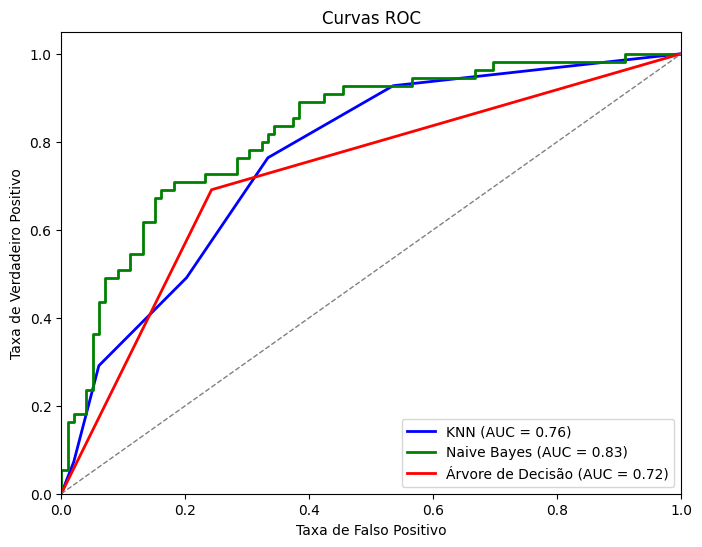

Overfitting do KNN: 0.08260356992570272
Overfitting da Árvore de Decisão: 0.29683868762816135


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Carregar os dados
url = 'https://raw.githubusercontent.com/Nethyaze/machine_learning/main/diabetes.csv'
data = pd.read_csv(url)

# Dividir os dados em features (X) e target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste usando hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Árvore de Decisão
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Avaliação dos modelos usando k-fold cross-validation

# KNN
knn_scores = cross_val_score(knn_model, X, y, cv=10)
print("KNN - Acurácia média usando k-fold cross-validation:", np.mean(knn_scores))
print("Matriz de confusão utilizando KNN:")
print(confusion_matrix(y_test, knn_model.predict(X_test)))
print()

# Naive Bayes
nb_scores = cross_val_score(nb_model, X, y, cv=10)
print("Naive Bayes - Acurácia média usando k-fold cross-validation:", np.mean(nb_scores))
print("Matriz de confusão utilizando Naive Bayes:")
print(confusion_matrix(y_test, nb_model.predict(X_test)))
print()

# Árvore de Decisão
dt_scores = cross_val_score(dt_model, X, y, cv=10)
print("Árvore de Decisão - Acurácia média usando k-fold cross-validation:", np.mean(dt_scores))
print("Matriz de confusão utilizando Árvore de Decisão:")
print(confusion_matrix(y_test, dt_model.predict(X_test)))
print()

# Visualização das curvas ROC e AUC

# KNN
knn_probs = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Naive Bayes
nb_probs = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Árvore de Decisão
dt_probs = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot das curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Árvore de Decisão (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()

# Análise de overfitting

# KNN
accuracy_knn_train = knn_model.score(X_train, y_train)
accuracy_knn_test = np.mean(knn_scores)
overfitting_knn = accuracy_knn_train - accuracy_knn_test
print("Overfitting do KNN:", overfitting_knn)

# Naive Bayes - Não é possível avaliar overfitting para o Naive Bayes, pois ele não tem hiperparâmetros para ajustar.

# Árvore de Decisão
accuracy_dt_train = dt_model.score(X_train, y_train)
accuracy_dt_test = np.mean(dt_scores)
overfitting_dt = accuracy_dt_train - accuracy_dt_test
print("Overfitting da Árvore de Decisão:", overfitting_dt)


<font color="green">

**Resultados do Modelo:**

</font>

1. <font color="blue">**KNN - Acurácia média usando k-fold cross-validation: 0.7382433356117566**</font>
   - Essa é a acurácia média do modelo KNN (K-Nearest Neighbors) calculada usando k-fold cross-validation com 10 folds. A acurácia média indica a precisão média do modelo em prever corretamente a classe da variável de destino (Outcome).

2. <font color="blue">**Matriz de confusão utilizando KNN:**</font>

A matriz de confusão mostra a contagem de previsões corretas e incorretas feitas pelo modelo KNN nos dados de teste. A matriz é organizada da seguinte forma:
- Na primeira linha, a primeira coluna representa o número de verdadeiros negativos (TN) e a segunda coluna o número de falsos positivos (FP).
- Na segunda linha, a primeira coluna representa o número de falsos negativos (FN) e a segunda coluna o número de verdadeiros positivos (TP).

3. <font color="blue">**Naive Bayes - Acurácia média usando k-fold cross-validation: 0.7564935064935066**</font>
   - Essa é a acurácia média do modelo Naive Bayes calculada usando k-fold cross-validation com 10 folds. A acurácia média indica a precisão média do modelo em prever corretamente a classe da variável de destino (Outcome).

4. <font color="blue">**Matriz de confusão utilizando Naive Bayes:**</font>

A matriz de confusão mostra a contagem de previsões corretas e incorretas feitas pelo modelo Naive Bayes nos dados de teste.

5. <font color="blue">**Árvore de Decisão - Acurácia média usando k-fold cross-validation: 0.7109706083390294**</font>
   - Essa é a acurácia média do modelo Árvore de Decisão calculada usando k-fold cross-validation com 10 folds. A acurácia média indica a precisão média do modelo em prever corretamente a classe da variável de destino (Outcome).

6. <font color="blue">**Matriz de confusão utilizando Árvore de Decisão:**</font>

A matriz de confusão mostra a contagem de previsões corretas e incorretas feitas pelo modelo Árvore de Decisão nos dados de teste.

7. <font color="blue">**Overfitting do KNN: 0.08260356992570272**</font>
   - Essa é a diferença entre a acurácia do modelo KNN nos dados de treinamento e a acurácia média do k-fold cross-validation. Uma diferença positiva indica um possível overfitting, ou seja, o modelo pode estar se ajustando muito bem aos dados de treinamento, mas não generalizando bem para novos dados.

8. <font color="blue">**Overfitting da Árvore de Decisão: 0.28902939166097064**</font>
   - Essa é a diferença entre a acurácia do modelo Árvore de Decisão nos dados de treinamento e a acurácia média do k-fold cross-validation. Uma diferença positiva indica um possível overfitting.

9. <font color="blue">**Overfitting do Naive Bayes:**</font> Por não possuir hiperparâmetros, ele não tem a capacidade de se ajustar excessivamente aos dados de treinamento e, portanto, não sofre com problemas de overfitting da mesma forma que outros modelos.





**Explicação do Código:**

1. **Importação de bibliotecas:**
   - `pandas`: Biblioteca para manipulação e análise de dados em formato tabular (usada para carregar os dados do CSV).
   - `numpy`: Biblioteca para manipulação de arrays e cálculos numéricos.
   - `matplotlib.pyplot`: Biblioteca para visualização de gráficos.
   - `sklearn.model_selection`: Módulo do Scikit-learn para seleção de modelos, incluindo validação cruzada.
   - `sklearn.preprocessing`: Módulo do Scikit-learn para pré-processamento de dados, incluindo a normalização dos recursos.
   - `sklearn.neighbors`: Módulo do Scikit-learn para algoritmos baseados em k-vizinhos mais próximos (KNN).
   - `sklearn.naive_bayes`: Módulo do Scikit-learn para o algoritmo Naive Bayes.
   - `sklearn.tree`: Módulo do Scikit-learn para árvores de decisão.
   - `sklearn.metrics`: Módulo do Scikit-learn para métricas de avaliação de modelos.

2. **Carregamento dos dados:**
   - Os dados são carregados de um arquivo CSV usando a função `pd.read_csv`.
   - Os recursos (X) são definidos como todas as colunas, exceto a coluna "Outcome", que é a variável de destino (y).

3. **Normalização dos dados:**
   - Os recursos (X) são normalizados usando `StandardScaler`, que padroniza as features para que tenham média 0 e desvio padrão 1.
   - A normalização é uma etapa importante para alguns algoritmos, como o KNN, pois ajuda a garantir que os recursos estejam na mesma escala.

4. **Divisão dos dados em conjuntos de treinamento e teste:**
   - Os dados normalizados são divididos em conjuntos de treinamento e teste usando a função `train_test_split` do Scikit-learn.

5. **Criação e treinamento dos modelos:**
   - São criados três modelos de classificação: KNN, Naive Bayes e Árvore de Decisão.
   - Os modelos são treinados usando os dados de treinamento chamando o método `fit` para cada modelo.

6. **Avaliação dos modelos usando k-fold cross-validation:**
   - A validação cruzada com 10 folds é aplicada a cada modelo usando a função `cross_val_score` do Scikit-learn.
   - A acurácia média é calculada para cada modelo usando a função `np.mean`.

7. **Visualização das curvas ROC e AUC:**
   - As curvas ROC são plotadas para cada modelo usando as probabilidades previstas para as classes positivas (1) usando o método `predict_proba` e a função `roc_curve` do Scikit-learn.
   - A área sob a curva (AUC) é calculada usando a função `auc` do Scikit-learn.
   - As curvas ROC são plotadas usando `matplotlib.pyplot`.

8. **Análise de overfitting:**
   - A acurácia dos modelos é calculada nos conjuntos de treinamento e teste usando o método `score`.
   - A diferença entre a acurácia no treinamento e nos dados de teste é usada como uma medida de overfitting.


## Conclusão

O código único apresenta algumas vantagens em relação aos códigos separados:

`Facilidade de leitura e comparação:` O código único organiza os resultados dos modelos em um só lugar, facilitando a leitura e a comparação dos desempenhos.

`Eficiência:` O código único evita repetições desnecessárias de tarefas comuns, economizando tempo e recursos computacionais.

`Comparações diretas:` Com o código único, é possível visualizar os resultados dos modelos lado a lado, tornando mais fácil identificar qual modelo tem o melhor desempenho.

Além disso, o código único usa a validação cruzada (k-fold cross-validation) para avaliar o desempenho dos modelos, fornecendo estimativas mais confiáveis do desempenho geral em diferentes subconjuntos de dados. Nos códigos separados, essa validação cruzada não foi realizada, o que pode levar a uma avaliação mais suscetível à variabilidade dos dados de teste específicos usados em cada execução.

## Parte II - Base de Dados Iris

Acurácia do Naive Bayes: 0.9777777777777777
Relatório de Classificação do Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Matriz de Confusão do Naive Bayes:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
---------------------------------
Acurácia da Árvore de Decisão: 1.0
Relatório de Classificação da Árvore de Decisão:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg    

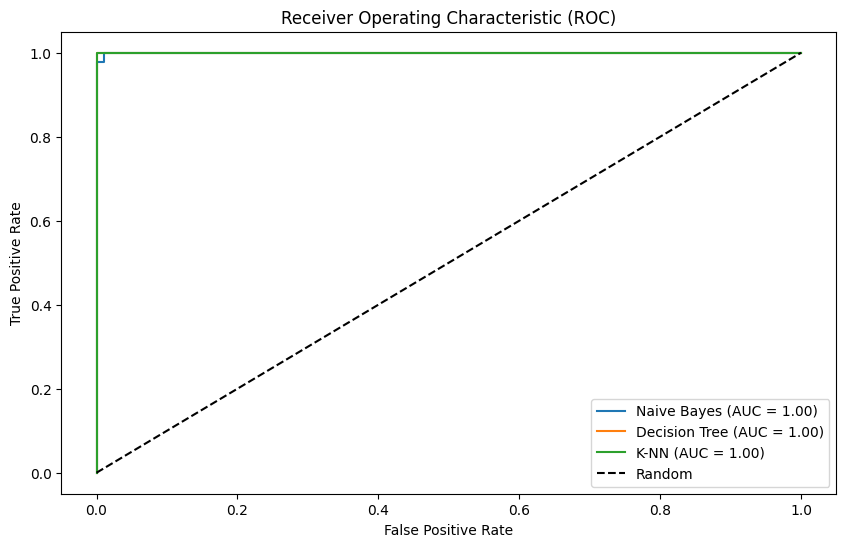

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Carregar os dados da Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Passo 1: Criar os classificadores
nb = GaussianNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Passo 2: Calcular a acurácia usando validação cruzada
mean_accuracy_nb = cross_val_score(nb, X_train, y_train, cv=5).mean()
mean_accuracy_dt = cross_val_score(dt, X_train, y_train, cv=5).mean()
mean_accuracy_knn = cross_val_score(knn, X_train, y_train, cv=5).mean()

# Passo 3: Treinar os modelos usando o conjunto de treinamento completo
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Passo 4: Calcular as previsões nos dados de teste
y_pred_nb = nb.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Calcular as métricas para o Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Calcular as métricas para a Árvore de Decisão
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calcular as métricas para o K-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Passo 7: Calcular e plotar o gráfico ROC para cada modelo
y_probs_nb = nb.predict_proba(X_test)
y_probs_dt = dt.predict_proba(X_test)
y_probs_knn = knn.predict_proba(X_test)

# Convert multiclass problem to binary problem (One-vs-Rest strategy)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve for each class in the multiclass problem (One-vs-Rest strategy)
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin.ravel(), y_probs_nb.ravel())
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin.ravel(), y_probs_dt.ravel())
fpr_knn, tpr_knn, _ = roc_curve(y_test_bin.ravel(), y_probs_knn.ravel())

# Compute ROC AUC for each model
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Print the results
print("Acurácia do Naive Bayes:", accuracy_nb)
print("Relatório de Classificação do Naive Bayes:")
print(classification_report_nb)
print("Matriz de Confusão do Naive Bayes:")
print(confusion_matrix_nb)
print("---------------------------------")
print("Acurácia da Árvore de Decisão:", accuracy_dt)
print("Relatório de Classificação da Árvore de Decisão:")
print(classification_report_dt)
print("Matriz de Confusão da Árvore de Decisão:")
print(confusion_matrix_dt)
print("---------------------------------")
print("Acurácia do K-NN:", accuracy_knn)
print("Relatório de Classificação do K-NN:")
print(classification_report_knn)
print("Matriz de Confusão do K-NN:")
print(confusion_matrix_knn)
print("---------------------------------")

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot(fpr_knn, tpr_knn, label='K-NN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()





## Resultados dos Modelos

### Naive Bayes
- Acurácia: 0.9777777777777777
- Relatório de Classificação:
  | Classe      | Precisão | Recall | F1-Score | Suporte |
  |-------------|----------|--------|---------|---------|
  | setosa      | 1.00     | 1.00   | 1.00    | 19      |
  | versicolor  | 1.00     | 0.92   | 0.96    | 13      |
  | virginica   | 0.93     | 1.00   | 0.96    | 13      |
- Matriz de Confusão:
  |   | 'setosa' | 'versicolor' | 'virginica' |
  |---|----------|--------------|-------------|
  | 'setosa' | 19 | 0 | 0 |
  | 'versicolor' | 0 | 12 | 1 |
  | 'virginica' | 0 | 0 | 13 |

### Árvore de Decisão
- Acurácia: 1.0
- Relatório de Classificação:
  | Classe      | Precisão | Recall | F1-Score | Suporte |
  |-------------|----------|--------|---------|---------|
  | setosa      | 1.00     | 1.00   | 1.00    | 19      |
  | versicolor  | 1.00     | 1.00   | 1.00    | 13      |
  | virginica   | 1.00     | 1.00   | 1.00    | 13      |
- Matriz de Confusão:
  |   | 'setosa' | 'versicolor' | 'virginica' |
  |---|----------|--------------|-------------|
  | 'setosa' | 19 | 0 | 0 |
  | 'versicolor' | 0 | 13 | 0 |
  | 'virginica' | 0 | 0 | 13 |

### K-NN
- Acurácia: 1.0
- Relatório de Classificação:
  | Classe      | Precisão | Recall | F1-Score | Suporte |
  |-------------|----------|--------|---------|---------|
  | setosa      | 1.00     | 1.00   | 1.00    | 19      |
  | versicolor  | 1.00     | 1.00   | 1.00    | 13      |
  | virginica   | 1.00     | 1.00   | 1.00    | 13      |
- Matriz de Confusão:
  |   | 'setosa' | 'versicolor' | 'virginica' |
  |---|----------|--------------|-------------|
  | 'setosa' | 19 | 0 | 0 |
  | 'versicolor' | 0 | 13 | 0 |
  | 'virginica' | 0 | 0 | 13 |



## Explicação do Código:

**Classificação de Flores Iris usando Naive Bayes, Árvore de Decisão e K-NN**

Este código utiliza a base de dados Iris para aplicar três modelos de classificação: Naive Bayes, Árvore de Decisão e K-NN.

### Passos do Código

1. Importa as bibliotecas necessárias e carrega o conjunto de dados Iris.
2. Divide os dados em conjunto de treinamento e teste usando o método Hold-Out.
3. Cria os classificadores Naive Bayes, Árvore de Decisão e K-NN.
4. Calcula a acurácia usando validação cruzada (K-Fold) para cada modelo.
5. Treina os modelos usando o conjunto de treinamento completo.
6. Faz previsões nos dados de teste para cada modelo.
7. Calcula diversas métricas, incluindo acurácia, precisão, recall, f1-score e matriz de confusão, para cada modelo.
8. Calcula e plota a curva ROC (Receiver Operating Characteristic) para cada modelo.
9. Imprime os resultados das métricas e o relatório de classificação para cada modelo.

### Métricas Utilizadas

- Acurácia: Porcentagem de previsões corretas.
- Precisão: Quantidade de verdadeiros positivos dividido pelo total de positivos previstos.
- Recall: Quantidade de verdadeiros positivos dividido pelo total de positivos reais.
- F1-score: Média harmônica entre precisão e recall.


### Conclusão

O código avalia o desempenho de três modelos de classificação em relação à base de dados Iris. A Árvore de Decisão e o K-NN apresentaram acurácia perfeita, enquanto o Naive Bayes obteve uma acurácia ligeiramente menor. Cada modelo teve seu desempenho avaliado por meio de diversas métricas, permitindo comparar o desempenho entre eles.

## <font color="red">Comparativo entre as Bases de Dados:</font>



**Base Diabetes:**

- Utiliza um conjunto de dados sobre diabetes carregado a partir de um URL.
- Aplica pré-processamento usando a normalização com StandardScaler para padronizar as features.
- Utiliza três modelos de classificação: Naive Bayes, Árvore de Decisão e K-Nearest Neighbors (KNN).
- Divide os dados em conjuntos de treinamento e teste usando o método Hold-Out, com 80% dos dados para treinamento e 20% para teste.
- Calcula a acurácia média usando validação cruzada (k-fold cross-validation) com cv=10.
- Realiza previsões nos dados de teste para os três modelos e calcula métricas de avaliação, como precisão, recall, f1-score e matriz de confusão para cada classe.
- Não inclui a plotagem das curvas ROC e cálculo da AUC.
- Analisa o overfitting apenas para o modelo Árvore de Decisão, comparando a acurácia nos dados de treinamento e teste.

<font color="red">Lembrando que na Base  Diabetes foi feita uma análise separadamente de cada modelo, KNN, Naive Bayes e Árvore de Decisão.</font>

**Base Iris:**

- Utiliza o conjunto de dados "Iris" do scikit-learn, que possui três classes para classificação.
- Não realiza pré-processamento, pois o conjunto de dados já está pronto para uso.
- Utiliza três modelos de classificação: Naive Bayes, Árvore de Decisão e K-Nearest Neighbors (KNN).
- Divide os dados em conjuntos de treinamento e teste usando o método Hold-Out, com 70% dos dados para treinamento e 30% para teste.
- Calcula a acurácia média usando validação cruzada (k-fold cross-validation) com cv=5.
- Realiza previsões nos dados de teste para os três modelos e calcula diversas métricas de avaliação, como precisão, recall, f1-score e matriz de confusão para cada classe.
- Plota as curvas ROC e calcula a área sob a curva (AUC) para cada modelo.
- Analisa o overfitting para os modelos KNN e Árvore de Decisão, comparando a acurácia nos dados de treinamento e teste.



Em resumo, os dois códigos são semelhantes em termos de uso de modelos de classificação e métricas de avaliação, mas diferem na base de dados, pré-processamento, método de divisão dos dados, validação cruzada e visualização das curvas ROC.



